In [2]:
import json

from pathlib import Path

import click
import pandas as pd
import torch
import torch.nn.functional as F

from torch.autograd import grad
from torch.optim import SGD
from torch.optim.lr_scheduler import StepLR
from tqdm.auto import tqdm

from src.experiments import log, load_model, save_data, initialize_sample_images


In [64]:
models = [
    load_model({
        "model_type": "ClassificationNet",
        "checkpoint": f"../models/vgg_hist/epoch={i}-val_accuracy=0.99.ckpt"
    })
    for i in [32, 45]
]

In [65]:
@torch.no_grad()
def get_angles(model) -> list[torch.Tensor]:
    return [
        p / torch.norm(p, p=1)
        for p in model.parameters()
    ]


@torch.no_grad()
def get_norms(model) -> list[torch.Tensor]:
    return [
        torch.norm(p, p=2)
        for p in model.parameters()
    ]

In [66]:
angles = list(map(get_angles, models))

In [67]:
differences = [
    torch.norm(a - b)
    for a, b in zip(*angles)
]

(array([26.,  1.,  0.,  0.,  1.,  2.,  0.,  3.,  3.,  1.,  4.,  3.,  1.,
         1.,  2.,  0.,  1.,  1.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.]),
 array([5.45334988e-05, 2.29084259e-03, 4.52715158e-03, 6.76346058e-03,
        8.99976958e-03, 1.12360781e-02, 1.34723876e-02, 1.57086961e-02,
        1.79450046e-02, 2.01813132e-02, 2.24176217e-02, 2.46539321e-02,
        2.68902406e-02, 2.91265491e-02, 3.13628614e-02, 3.35991681e-02,
        3.58354785e-02, 3.80717888e-02, 4.03080955e-02, 4.25444059e-02,
        4.47807126e-02, 4.70170230e-02, 4.92533334e-02, 5.14896400e-02,
        5.37259504e-02, 5.59622608e-02, 5.81985675e-02, 6.04348779e-02,
        6.26711845e-02, 6.49074912e-02, 6.71437979e-02]),
 <BarContainer object of 30 artists>)

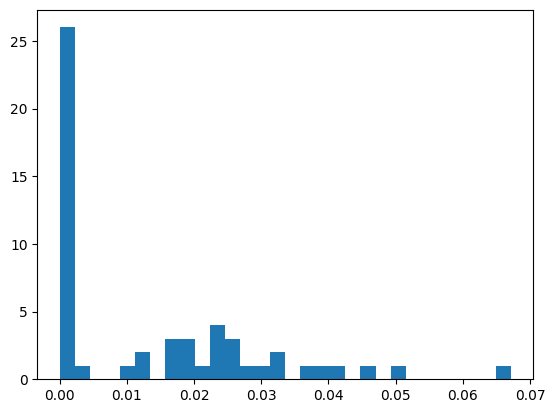

In [68]:
import matplotlib.pyplot as plt


plt.hist(differences, bins=30)

tensor(0.1036)

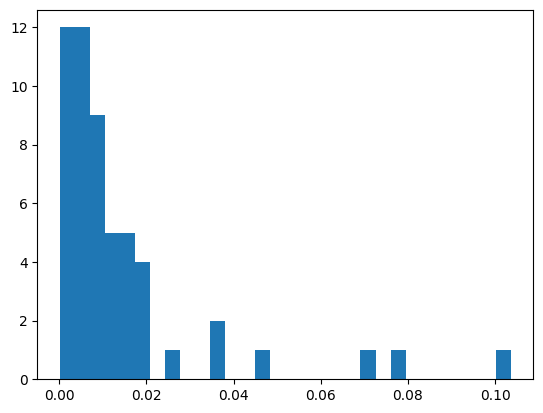

In [69]:
norms = list(map(get_norms, models))

plt.hist([abs(a - b) for a, b in zip(*norms)], bins=30)
max(abs(a - b) for a, b in zip(*norms))

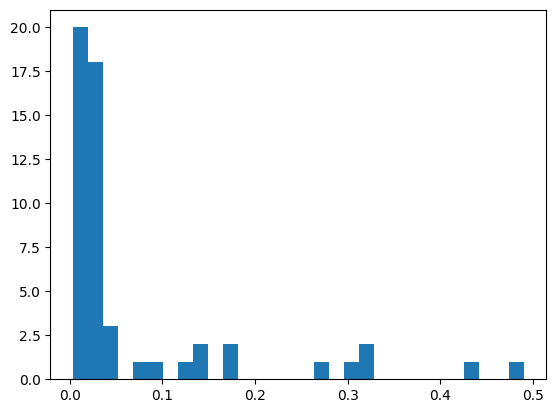

tensor(0.4904)

In [70]:
with torch.no_grad():
    differences = [
        torch.norm(a - b)
        for a, b in zip(models[0].parameters(), models[1].parameters())
    ]

plt.hist(differences, bins=30)
plt.show()
max(differences)